<p style="text-align: center"><img src="https://gitlab.aicrowd.com/aicrowd/assets/-/raw/master/challenges/clock-decomposition/notebook-banner.jpg?inline=false" alt="Drawing" style="height: 400px;"/></p>

# Simple EDA and baseline models

The challenge is to use the features extracted from the Clock Drawing Test to build an automated and algorithm to predict whether each participant is one of three phases:

1)    Pre-Alzheimer’s (Early Warning)
2)    Post-Alzheimer’s (Detection)
3)    Normal (Not an Alzheimer’s patient)

In machine learning terms: this is a 3-class classification task.

# How to use this notebook? 📝

<p style="text-align: center"><img src="https://gitlab.aicrowd.com/aicrowd/assets/-/raw/master/notebook/aicrowd_notebook_submission_flow.png?inline=false" alt="notebook overview" style="width: 650px;"/></p>

- **Update the config parameters**. You can define the common variables here

Variable | Description
--- | ---
`AICROWD_DATASET_PATH` | Path to the file containing test data (The data will be available at `/ds_shared_drive/` on aridhia workspace). This should be an absolute path.
`AICROWD_PREDICTIONS_PATH` | Path to write the output to.
`AICROWD_ASSETS_DIR` | In case your notebook needs additional files (like model weights, etc.,), you can add them to a directory and specify the path to the directory here (please specify relative path). The contents of this directory will be sent to AIcrowd for evaluation.
`AICROWD_API_KEY` | In order to submit your code to AIcrowd, you need to provide your account's API key. This key is available at https://www.aicrowd.com/participants/me

- **Installing packages**. Please use the [Install packages 🗃](#install-packages-) section to install the packages
- **Training your models**. All the code within the [Training phase ⚙️](#training-phase-) section will be skipped during evaluation. **Please make sure to save your model weights in the assets directory and load them in the predictions phase section** 

# Setup AIcrowd Utilities 🛠

We use this to bundle the files for submission and create a submission on AIcrowd. Do not edit this block.

In [1]:
!pip install -q -U aicrowd-cli

In [2]:
%load_ext aicrowd.magic

# AIcrowd Runtime Configuration 🧷

Define configuration parameters. Please include any files needed for the notebook to run under `ASSETS_DIR`. We will copy the contents of this directory to your final submission file 🙂

The dataset is available under `/ds_shared_drive` on the workspace.

In [3]:
import os

# Please use the absolute for the location of the dataset.
# Or you can use relative path with `os.getcwd() + "test_data/validation.csv"`
AICROWD_DATASET_PATH = os.getenv("DATASET_PATH", "/ds_shared_drive/validation.csv")
AICROWD_PREDICTIONS_PATH = os.getenv("PREDICTIONS_PATH", "predictions.csv")
AICROWD_ASSETS_DIR = "assets"
AICROWD_API_KEY = "" # Get your key from https://www.aicrowd.com/participants/me

# Install packages 🗃

Please add all pacakage installations in this section

In [4]:
!pip install numpy pandas
!pip install seaborn lightgbm scikit-learn

# Define preprocessing code 💻

The code that is common between the training and the prediction sections should be defined here. During evaluation, we completely skip the training section. Please make sure to add any common logic between the training and prediction sections here.

### Import common packages

Please import packages that are common for training and prediction phases here.

In [5]:
import numpy as np
import pandas as pd

In [6]:
# some precessing code

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import joblib

import warnings
warnings.filterwarnings("ignore")

# Training phase ⚙️

You can define your training code here. This sections will be skipped during evaluation.

In [8]:
# model = define_your_model

## Load training data

In [9]:
# load your data

In [10]:
AICROWD_DATASET_PATH

'/ds_shared_drive/validation.csv'

In [11]:
target_col = "diagnosis"
key_col = "row_id"
cat_cols = ['intersection_pos_rel_centre']
seed = 2021

target_values = ["normal", "post_alzheimer", "pre_alzheimer"]

train = pd.read_csv(AICROWD_DATASET_PATH.replace("validation", "train"))
train = train[train[target_col].isin(target_values)].copy().reset_index(drop=True)


print(train.shape)
features = train.columns[1:-1].to_list()

numeric_features = [c for c in features if c not in cat_cols]
for c in numeric_features:
    train[c] = train[c].astype(float)

print(train[target_col].value_counts())
train.tail(3)

(32777, 122)
normal            31208
post_alzheimer     1149
pre_alzheimer       420
Name: diagnosis, dtype: int64


row_id  number_of_digits  missing_digit_1  missing_digit_2  missing_digit_3  missing_digit_4  missing_digit_5  missing_digit_6  missing_digit_7  missing_digit_8  missing_digit_9  missing_digit_10  missing_digit_11  missing_digit_12  1 dist from cen  10 dist from cen  11 dist from cen  12 dist from cen  2 dist from cen  3 dist from cen  4 dist from cen  5 dist from cen  6 dist from cen  7 dist from cen  8 dist from cen  9 dist from cen  euc_dist_digit_1  euc_dist_digit_2  euc_dist_digit_3  euc_dist_digit_4  euc_dist_digit_5  euc_dist_digit_6  euc_dist_digit_7  euc_dist_digit_8  euc_dist_digit_9  euc_dist_digit_10  euc_dist_digit_11  euc_dist_digit_12  area_digit_1  area_digit_2  area_digit_3  area_digit_4  area_digit_5  area_digit_6  area_digit_7  area_digit_8  area_digit_9  area_digit_10  area_digit_11  area_digit_12  height_digit_1  height_digit_2  height_digit_3  height_digit_4  height_digit_5  height_digit_6  height_digit_7  height_digit_8  height_digit_9  \
32774  YKCXR5L3HUEXI9129              11.0              1.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0               0.0               1.0               0.0              NaN        415.609492               NaN        404.931167       343.933496       350.160677       411.903508       408.573127       388.002900       342.225437       372.795185       383.355253               NaN          6.460009              5.59         13.248901          0.086013              0.39          1.474322          9.459343              4.29           1.136238                NaN              10.27           NaN        2520.0        1815.0        4823.0        4440.0        2970.0        2166.0        3096.0        2360.0         3250.0            NaN         5150.0             NaN            40.0            55.0            91.0            74.0            66.0            57.0            72.0            59.0   
32775  0MFBMF7ZRBSAH8ASA              10.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0              1.0              1.0               0.0               0.0               0.0       433.959099        441.208568        408.001225        405.226171       417.833101       365.256759       339.988970       364.785553       397.165583       451.738863              NaN              NaN          5.641735          7.531402             20.67          9.179425          9.302904             25.87         48.801311               NaN               NaN          20.980509          27.633149               8.19        1881.0        1505.0        2537.0        2911.0        3477.0        3337.0        2640.0           NaN           NaN         2800.0         2376.0         3050.0            57.0            43.0            59.0            71.0            61.0            71.0            60.0             NaN             NaN   
32776  NMOMZBPRJMJCFOONV              11.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0               0.0               1.0               0.0       439.300581        488.530961               NaN        438.130688       453.176014       424.410474       380.000000       371.031333       307.591450       358.568334       377.794256       429.549182        111.504807        109.183899             98.93         85.563310         87.320320             79.95         92.758482         98.168063            109.85                NaN                NaN             113.75        1680.0        1927.0        2256.0        2992.0        3366.0        7755.0        2870.0        2795.0        5655.0         1833.0            NaN         1681.0            28.0            41.0            47.0            44.0            51.0            55.0            41.0            43.0            65.0   

       height_digit_10  height_digit_11  

### Target

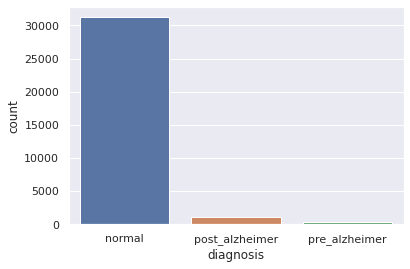

In [12]:
sns.countplot(x=target_col, data=train);

### Numerical features

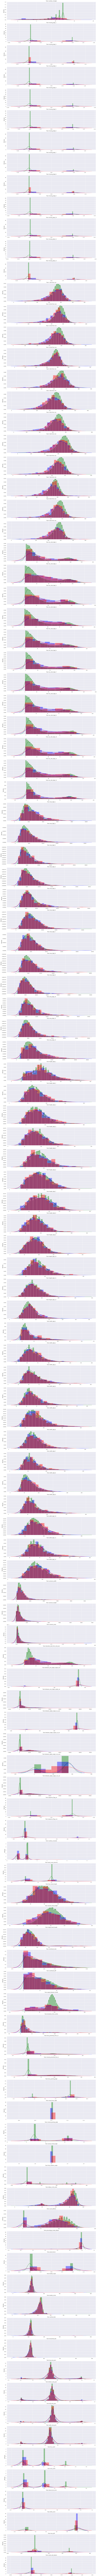

In [13]:
nb_shown = len(numeric_features)
fig, ax = plt.subplots(nb_shown, 1, figsize=(20,5*nb_shown))

colors = ["Green", "Blue", "Red"]
for i, col in enumerate(numeric_features[:nb_shown]):
    for value, color in zip(target_values, colors):
        sns.distplot(train.loc[train[target_col]==value, col], 
                     ax=ax[i], color=color, norm_hist=True)
        ax[i].set_title("Train {}".format(col))
    ax[i].set_xlabel("")
    ax[i].set_xlabel("")

### Categorical features

There is only 1 single categorical feature


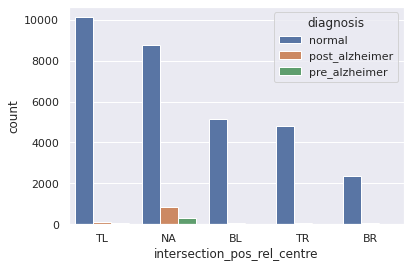

In [14]:
sns.countplot(x=cat_cols[0], hue=target_col, data=train[cat_cols+[target_col]].fillna("NA"));

### Balance the dataset and see the the distribution again

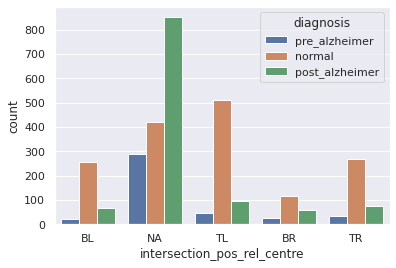

In [15]:
df_pos = train[train[target_col].isin(target_values[1:])]
nb_pos = df_pos.shape[0]
nb_neg = nb_pos
df_neg = train[train[target_col] == "normal"].sample(n=nb_neg, random_state=seed)
df_samples = pd.concat([df_pos, df_neg]).sample(frac=1).reset_index(drop=True)

sns.countplot(x=cat_cols[0], hue=target_col, data=df_samples[cat_cols+[target_col]].fillna("NA"));

## Train your model

In [16]:
# model.fit(train_data)

In [17]:
# some custom code block

### Simple FE

In [18]:
print(cat_cols)
for c in cat_cols:
    df_samples[c].fillna("NA", inplace=True)
    
df_dummies = pd.get_dummies(df_samples[cat_cols], columns=cat_cols, dummy_na=True).add_prefix('CAT_')
dummy_cols = df_dummies.columns.to_list()
print(dummy_cols)

df_samples = pd.concat([df_samples, df_dummies], axis=1)
df_samples['cnt_NaN'] = df_samples[numeric_features].isna().sum(axis=1)

df_samples.fillna(-1, inplace=True)
df_samples.head(3)

['intersection_pos_rel_centre']
['CAT_intersection_pos_rel_centre_BL', 'CAT_intersection_pos_rel_centre_BR', 'CAT_intersection_pos_rel_centre_NA', 'CAT_intersection_pos_rel_centre_TL', 'CAT_intersection_pos_rel_centre_TR', 'CAT_intersection_pos_rel_centre_nan']


row_id  number_of_digits  missing_digit_1  missing_digit_2  missing_digit_3  missing_digit_4  missing_digit_5  missing_digit_6  missing_digit_7  missing_digit_8  missing_digit_9  missing_digit_10  missing_digit_11  missing_digit_12  1 dist from cen  10 dist from cen  11 dist from cen  12 dist from cen  2 dist from cen  3 dist from cen  4 dist from cen  5 dist from cen  6 dist from cen  7 dist from cen  8 dist from cen  9 dist from cen  euc_dist_digit_1  euc_dist_digit_2  euc_dist_digit_3  euc_dist_digit_4  euc_dist_digit_5  euc_dist_digit_6  euc_dist_digit_7  euc_dist_digit_8  euc_dist_digit_9  euc_dist_digit_10  euc_dist_digit_11  euc_dist_digit_12  area_digit_1  area_digit_2  area_digit_3  area_digit_4  area_digit_5  area_digit_6  area_digit_7  area_digit_8  area_digit_9  area_digit_10  area_digit_11  area_digit_12  height_digit_1  height_digit_2  height_digit_3  height_digit_4  height_digit_5  height_digit_6  height_digit_7  height_digit_8  height_digit_9  \
0  XSR3WB69PLAS5HY96               8.0              1.0              0.0              0.0              0.0              0.0              0.0              0.0              1.0              1.0               0.0               1.0               0.0        -1.000000        353.839653         -1.000000        286.768635       306.894118       263.427409       247.449490       255.840282       315.791466       375.300213        -1.000000        -1.000000         -1.000000          6.868341              3.90          5.471075         15.703004             27.17         11.775069         -1.000000             -1.00          56.485580          -1.000000              53.56          -1.0        5040.0        5568.0        7254.0       12782.0        7636.0        7884.0          -1.0          -1.0        15943.0           -1.0         4104.0            -1.0            72.0            96.0            93.0            83.0            92.0           108.0            -1.0            -1.0   
1  PIAYSCOQO68RFJBWJ              11.0              0.0              1.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0               0.0               0.0               0.0       314.650600        322.321656        282.287974        313.882940        -1.000000       319.712762       319.845275       315.300254       330.351706       338.691969       341.685894       319.531689         16.803673         -1.000000             18.72          1.532490          1.311990             28.60         26.586651         18.092173              1.17           4.061573          11.432072               4.03        2772.0          -1.0        5472.0        4960.0        6188.0        6776.0        5440.0        6370.0        2623.0        13020.0         5005.0         9125.0            66.0            -1.0            96.0            80.0            91.0           121.0            85.0           130.0            61.0   
2  YU1BFHD48SJV3ARKE              10.0              0.0              0.0              1.0              0.0              1.0              0.0              0.0              0.0              0.0               0.0               0.0               0.0       289.084763        383.589950        364.310993        351.458746       350.508916        -1.000000       228.985807        -1.000000       174.997857       348.621571       222.946182       348.686464         10.794822         46.127917             -1.00         40.293903         -1.000000             41.47         22.570652         12.023504             36.01           0.362155           6.851571              10.79        2944.0        6715.0          -1.0       13221.0          -1.0        6642.0        5580.0       13056.0        5518.0         7070.0         9315.0        15030.0            92.0            85.0            -1.0           113.0            -1.0            82.0            90.0           102.0            89.0   

   height_digit_10  height_digit_11  height_digit_12 

In [19]:
model_features = df_samples.columns.to_list()
model_features = [c for c in model_features if c not in [key_col, target_col] + cat_cols]

unique_value_cols = []
for c in model_features:
    if df_samples[c].unique().shape[0] == 1:
        unique_value_cols.append(c)
        
print(unique_value_cols)
model_features = [c for c in model_features if c not in unique_value_cols]
print(len(model_features))

['actual_hour_digit', 'actual_minute_digit', 'CAT_intersection_pos_rel_centre_nan']
123


### Train models with 5 folds

In [20]:
X_train = df_samples[model_features]
y_train = df_samples[target_col].map(dict(zip(target_values, list(range(len(target_values))))))

skf = StratifiedKFold(n_splits=5, random_state=2021, shuffle=True)
preds = 0.0

params = {
          "objective" : "multiclass",
          "num_class" : len(target_values),
          "bagging_seed" : 2021,
          "verbosity" : 1 }

clfs = []
for fold, (itrain, ivalid) in enumerate(skf.split(X_train, y_train)):
    print("-"*40)
    print(f"Running for fold {fold}")
    lgb_train = lgb.Dataset(X_train.iloc[itrain], y_train.iloc[itrain])
    lgb_eval  = lgb.Dataset(X_train.iloc[ivalid], y_train.iloc[ivalid], reference = lgb_train)
    clf = lgb.train(params, lgb_train, 1000, valid_sets=[lgb_eval], 
                    early_stopping_rounds=100, verbose_eval=200)

    clfs.append(clf)

----------------------------------------
Running for fold 0
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18673
[LightGBM] [Info] Number of data points in the train set: 2510, number of used features: 123
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.004752
[LightGBM] [Info] Start training from score -2.010927
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[18]	valid_0's multi_logloss: 0.767179
----------------------------------------
Running for fold 1
[LightGBM] [Warning] Find whitespaces in feature_names, replace w

### Let's see the features importance of a model

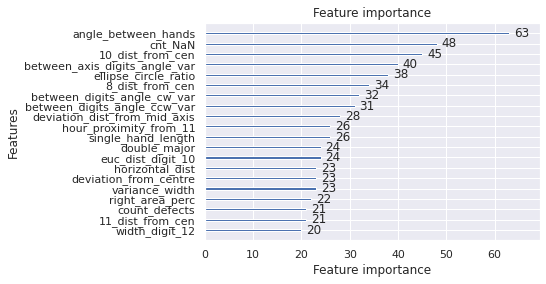

In [21]:
lgb.plot_importance(clf, max_num_features=20);

## Save your trained model

In [22]:
# model.save()

In [23]:
for i, clf in enumerate(clfs):
    model_filename = f'{AICROWD_ASSETS_DIR}/model_lgb_fold_{i}.pkl'
    joblib.dump(clf, model_filename)

In [24]:
meta = {
    "numeric_features": numeric_features,
    "cat_cols": cat_cols,
    "dummy_cols": dummy_cols,
    "model_features": model_features
}
meta_filename = f'{AICROWD_ASSETS_DIR}/model_lgb_meta.pkl'
joblib.dump(meta, meta_filename)

['assets/model_lgb_meta.pkl']

# Prediction phase 🔎

Please make sure to save the weights from the training section in your assets directory and load them in this section

In [25]:
# model = load_model_from_assets_dir(AIcrowdConfig.ASSETS_DIR)

In [26]:
nb_folds = 5 # skf.n_splits
clfs = []
for fold in range(nb_folds):
    print("-"*40)
    print(f"Running for fold {fold}")
    model_filename = f'{AICROWD_ASSETS_DIR}/model_lgb_fold_{fold}.pkl'
    
    clf = joblib.load(model_filename)
    clfs.append(clf)
    
print("-"*40)
meta_filename = f'{AICROWD_ASSETS_DIR}/model_lgb_meta.pkl'
meta = joblib.load(meta_filename)
print(meta.keys())

numeric_features = meta['numeric_features']
cat_cols = meta['cat_cols']
dummy_cols = meta['dummy_cols']
model_features = meta['model_features']

----------------------------------------
Running for fold 0
----------------------------------------
Running for fold 1
----------------------------------------
Running for fold 2
----------------------------------------
Running for fold 3
----------------------------------------
Running for fold 4
----------------------------------------
dict_keys(['numeric_features', 'cat_cols', 'dummy_cols', 'model_features'])


## Load test data

In [27]:
test_data = pd.read_csv(AICROWD_DATASET_PATH)
test_data.head()

row_id  number_of_digits  missing_digit_1  missing_digit_2  missing_digit_3  missing_digit_4  missing_digit_5  missing_digit_6  missing_digit_7  missing_digit_8  missing_digit_9  missing_digit_10  missing_digit_11  missing_digit_12  1 dist from cen  10 dist from cen  11 dist from cen  12 dist from cen  2 dist from cen  3 dist from cen  4 dist from cen  5 dist from cen  6 dist from cen  7 dist from cen  8 dist from cen  9 dist from cen  euc_dist_digit_1  euc_dist_digit_2  euc_dist_digit_3  euc_dist_digit_4  euc_dist_digit_5  euc_dist_digit_6  euc_dist_digit_7  euc_dist_digit_8  euc_dist_digit_9  euc_dist_digit_10  euc_dist_digit_11  euc_dist_digit_12  area_digit_1  area_digit_2  area_digit_3  area_digit_4  area_digit_5  area_digit_6  area_digit_7  area_digit_8  area_digit_9  area_digit_10  area_digit_11  area_digit_12  height_digit_1  height_digit_2  height_digit_3  height_digit_4  height_digit_5  height_digit_6  height_digit_7  height_digit_8  height_digit_9  \
0  LA9JQ1JZMJ9D2MBZV              11.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0               1.0               0.0               0.0       314.649805               NaN        408.240125        323.348110       321.706776       264.496219       203.330396       205.081082       282.015070       343.657169       416.716030       435.900218          6.119758         25.267069             17.29          6.006505         10.246421             14.43          4.778738         43.124586             46.80                NaN          67.293643               3.90        2001.0        4180.0        6318.0        6528.0        6370.0        8127.0        5610.0        3312.0        9372.0            NaN         3500.0         6336.0            69.0            95.0           117.0           128.0            98.0           129.0           102.0            69.0           142.0   
1  PSSRCWAPTAG72A1NT               6.0              1.0              1.0              0.0              1.0              1.0              0.0              0.0              0.0              0.0               1.0               0.0               1.0              NaN               NaN        235.663425               NaN              NaN       325.616722              NaN              NaN       288.257264       292.027396       334.951116       370.648756               NaN               NaN             22.88               NaN               NaN             72.80         72.787316         20.133319             96.33                NaN          60.955820                NaN           NaN           NaN       12390.0           NaN           NaN        8848.0        5632.0       10434.0        7739.0            NaN        11834.0            NaN             NaN             NaN           118.0             NaN             NaN            79.0            64.0            94.0            71.0   
2  GCTODIZJB42VCBZRZ              11.0              0.0              0.0              0.0              0.0              1.0              0.0              0.0              0.0              0.0               0.0               0.0               0.0       438.627689        429.789774        447.455305        447.033835       409.185166       361.946474       359.824957              NaN       345.937133       366.201106       375.225266       427.154831        112.333641        100.371900             86.45         86.234478               NaN             89.57         94.556399         97.331146            111.02         111.411562         116.061975             116.22        3182.0        4473.0        4554.0        5032.0           NaN        5355.0        4148.0        4320.0        4420.0         7290.0         2726.0         5184.0            43.0            71.0            69.0            68.0             NaN            51.0            68.0            48.0            52.0   
3  7YMVQGV1CDB1WZFNE               3.0              1.

## Generate predictions

In [28]:
test_data = test_data.copy()

for c in numeric_features:
    test_data[c] = test_data[c].astype(float)
    
for c in cat_cols:
    test_data[c].fillna("NA", inplace=True)
    
df_test_dummies = pd.get_dummies(test_data[cat_cols], columns=cat_cols, dummy_na=True).add_prefix('CAT_')
test_data = pd.concat([test_data, df_test_dummies], axis=1)
test_data['cnt_NaN'] = test_data[numeric_features].isna().sum(axis=1)

test_data.fillna(-1, inplace=True)

for c in dummy_cols:
    if c not in test_data.columns:
        test_data[c] = 0

print("Missing columns:", [c for c in model_features if c not in test_data.columns])
test_data.head(3)

X_test = test_data[model_features]

preds = 0.0
nb_folds = 5 # skf.n_splits
for fold, clf in enumerate(clfs):
    print("-"*40)
    print(f"Running for fold {fold}")
    pred = clf.predict(X_test)
    preds += pred/nb_folds
    
print(preds.shape)

Missing columns: []
----------------------------------------
Running for fold 0
----------------------------------------
Running for fold 1
----------------------------------------
Running for fold 2
----------------------------------------
Running for fold 3
----------------------------------------
Running for fold 4
(362, 3)


In [29]:
predictions = {
    "row_id": test_data["row_id"].values,
    "normal_diagnosis_probability": preds[:,0],
    "post_alzheimer_diagnosis_probability": preds[:,1],
    "pre_alzheimer_diagnosis_probability": preds[:,2]
}

predictions_df = pd.DataFrame.from_dict(predictions)

## Save predictions 📨

In [30]:
predictions_df.to_csv(AICROWD_PREDICTIONS_PATH, index=False)

# Submit to AIcrowd 🚀

**NOTE: PLEASE SAVE THE NOTEBOOK BEFORE SUBMITTING IT (Ctrl + S)**

In [31]:
!aicrowd login --api-key $AICROWD_API_KEY
!DATASET_PATH=$AICROWD_DATASET_PATH \
aicrowd notebook submit \
    --assets-dir $AICROWD_ASSETS_DIR \
    --challenge addi-alzheimers-detection-challenge

Error: --api-key option requires an argument
Using notebook: /home/desktop0/public_baseline.ipynb for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...
Validating the submission...
Executing install.ipynb...
[NbConvertApp] Converting notebook /home/desktop0/submission/install.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python
[NbConvertApp] Writing 4345 bytes to /home/desktop0/submission/install.nbconvert.ipynb
Executing predict.ipynb...
[NbConvertApp] Converting notebook /home/desktop0/submission/predict.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python
[NbConvertApp] Writing 54460 bytes to /home/desktop0/submission/predict.nbconvert.ipynb
submission.zip ━━━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 8.2/8.2 MB • 2.7 MB/s • 0:00:00 • 0:00:010:00:01
                                                 ╭─────────────────────────╮                                                 
                           